In [1]:
# 📌 1️⃣ Introduction
# analyzes retail sales data to find key business insights.

# 📌 2️⃣ Load Libraries & Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Sales_Data.xlsx"  # Update the path if needed
df = pd.read_excel(file_path, sheet_name="sales_data")

# Display first few rows
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
df.duplicated().sum()


0

In [3]:
# Check for missing values
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
df.drop(columns=["ADDRESSLINE2"], inplace=True)
df["STATE"] = df["STATE"].fillna("Unknown")
df["POSTALCODE"] = df["POSTALCODE"].fillna(0)
df["TERRITORY"] = df["TERRITORY"].fillna("Unknown")
df.isnull().sum()


ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


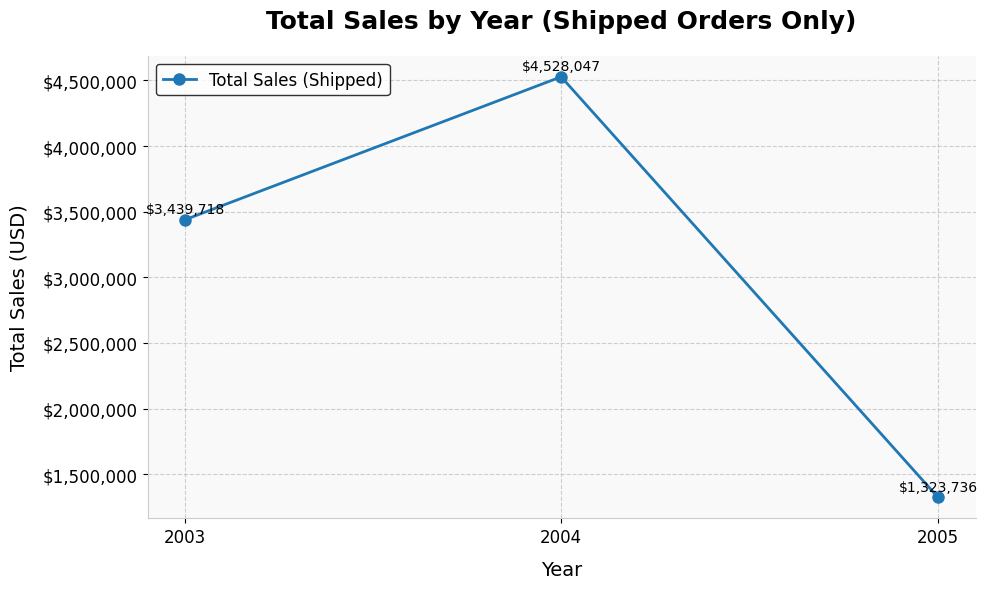

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import pandas as pd

# Filter only rows where status is 'Shipped'
df_shipped = df[df["STATUS"] == "Shipped"]

# Group sales by year
sales_per_year = df_shipped.groupby("YEAR_ID")["SALES"].sum()

# Convert index to datetime format
sales_per_year.index = pd.to_datetime(sales_per_year.index, format='%Y')

# Plot the sales per year
plt.figure(figsize=(10, 6))
plt.plot(
    sales_per_year.index, sales_per_year.values, 
    marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8, 
    label="Total Sales (Shipped)"
)

plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Total Sales (USD)", fontsize=14, labelpad=10)
plt.title("Total Sales by Year (Shipped Orders Only)", fontsize=18, pad=20, weight='bold')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))
plt.grid(True, linestyle="--", alpha=0.6)
plt.gca().set_facecolor('#f9f9f9')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')

for x, y in zip(sales_per_year.index, sales_per_year.values):
    plt.text(x, y + 50000, f"${y:,.0f}", ha='center', fontsize=10, color='black')

plt.legend(fontsize=12, loc='upper left', frameon=True, facecolor="white", edgecolor="black")
plt.tight_layout()
plt.show()


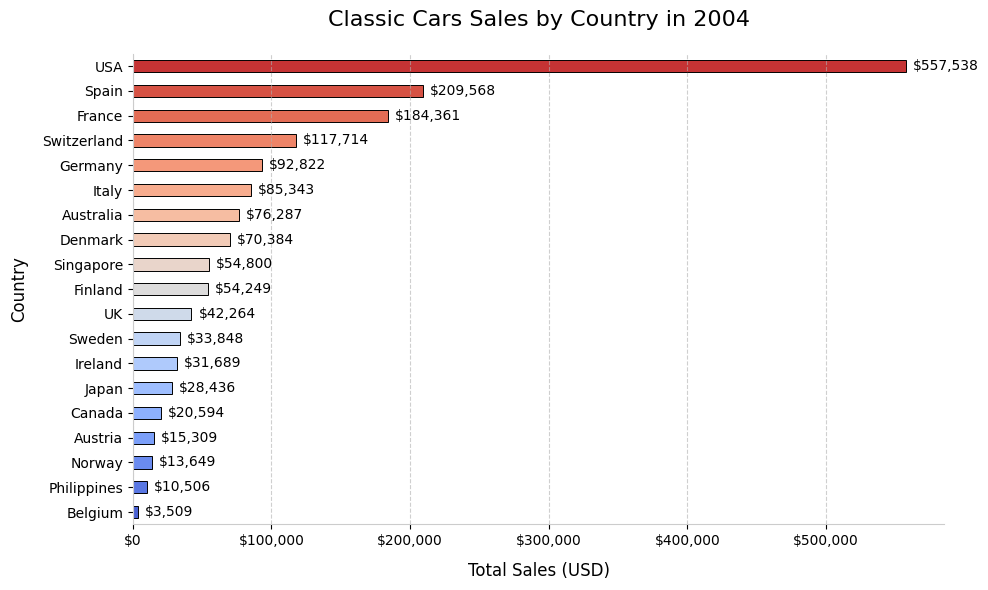

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Filter for Classic Cars sales in 2004
classic_cars_2004 = df[(df["YEAR_ID"] == 2004) & (df["PRODUCTLINE"] == "Classic Cars") & (df["STATUS"] == "Shipped")]

# Group sales by country
sales_by_country = classic_cars_2004.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=True)

# Generate colors using Seaborn
colors = sns.color_palette("coolwarm", len(sales_by_country))

# Plot the sales per country
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind="barh", color=colors, edgecolor="black", linewidth=0.7)

# Labels and title
plt.xlabel("Total Sales (USD)", fontsize=12, labelpad=10)
plt.ylabel("Country", fontsize=12, labelpad=10)
plt.title("Classic Cars Sales by Country in 2004", fontsize=16, pad=20)

# Format x-axis as currency ($)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))

# Add gridlines for better readability
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Add a light border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')

# Add annotations for each bar
for i, value in enumerate(sales_by_country):
    plt.text(value + 5000, i, f"${value:,.0f}", va='center', fontsize=10, color='black')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


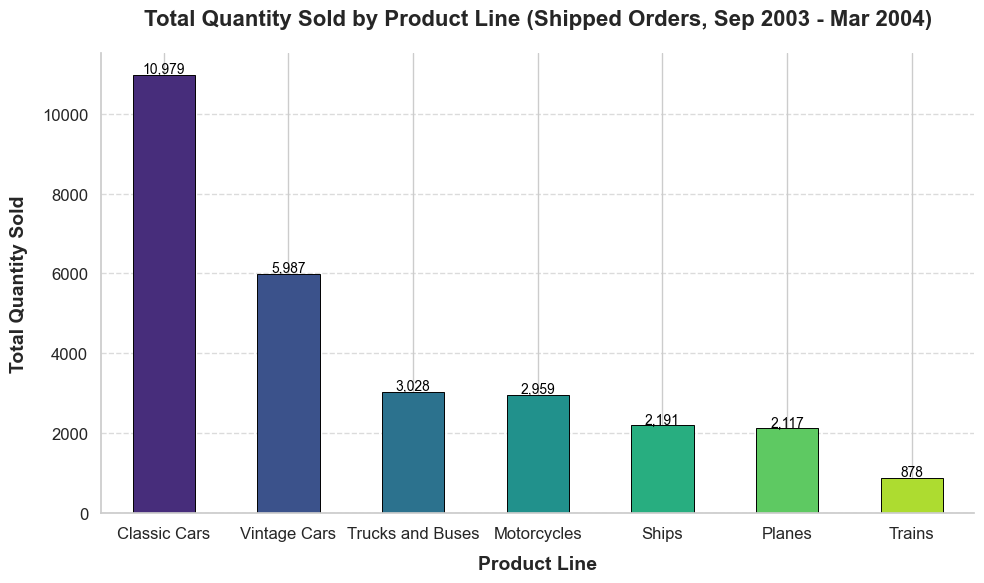

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Filter data between September 2003 and March 2004 AND only 'Shipped' status
start_date = "2003-09-01"
end_date = "2004-03-31"
filtered_df = df[
    (df['ORDERDATE'] >= start_date) &
    (df['ORDERDATE'] <= end_date) &
    (df['STATUS'] == "Shipped")
].copy()

# Group by 'PRODUCTLINE' and sum the quantities
total_quantity_by_productline = filtered_df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()

# Sort the product lines by total quantity sold
total_quantity_by_productline = total_quantity_by_productline.sort_values(ascending=False)

# Set a modern style for the plot
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(total_quantity_by_productline))
total_quantity_by_productline.plot(kind='bar', color=colors, edgecolor='black', linewidth=0.7)

# Add labels and title
plt.xlabel("Product Line", fontsize=14, labelpad=10, weight='bold')
plt.ylabel("Total Quantity Sold", fontsize=14, labelpad=10, weight='bold')
plt.title("Total Quantity Sold by Product Line (Shipped Orders, Sep 2003 - Mar 2004)", fontsize=16, pad=20, weight='bold')

# Add annotations for each bar
for i, value in enumerate(total_quantity_by_productline):
    plt.text(i, value + 50, f"{value:,.0f}", ha='center', fontsize=10, color='black')

# Customize the plot
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
